<a href="https://colab.research.google.com/github/91MLP/COMP3122/blob/main/Lab10_MPG_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Liner Regression with mpg dataset

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# imoort train test split
from sklearn.model_selection import train_test_split

# Note, seaborn is not available in Jupyter Lite, use Collab or a local environment
import seaborn as sns # we use this library to load the dataset

## Pandas References

You can use `pandas_summary` file throughout this notebook to get a quick reference to pandas functions. The file is located in the same directory as this notebook.|


## Load data

In [3]:
# Load the 'mpg' dataset using seaborn library into a Pandas DataFrame
df = sns.load_dataset('mpg')

MPG dataset can be viewed online at  
https://github.com/mwaskom/seaborn-data/blob/master/mpg.csv

#### What is the type of the dateset? (type(df))

In [ ]:
#your code here

`DataFrame` is a fundamental Pandas structure. It is essentially a table with rows and columns. You can think of it as a spreadsheet or SQL table. DataFrames are particularly useful because they can handle a large amount of data and are very fast.

#### Show the first 5 rows of the dataset

In [ ]:
#your code here

## Data Preprocessing


Since most cars weight around 1-2 tons, it's convenient to convert the weight to metric tons here

$
\text{tons} = \frac{\text{pounds}}{2204.62}
$

Converting gas usage to Litres per 100km is important to get a better linear fit

$
\text{lphk} = \frac{235.214}{\text{MPG}}
$


#### Change the weight column to metric tons and add one column for `lphk`

In [9]:
df.weight

,weight
0,1.589390
1,1.675119
2,1.558545
3,1.557184
4,1.564442
...,...
393,1.265524
394,0.966153
395,1.040996
396,1.190681


In [8]:
# your code here
df["weight"]=df["weight"]/2204.62


In [6]:
df["lphk"]=235.21/df["mpg"]

### Handing missing data

In [7]:
df.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
name,0
weight_tons,0


In [ ]:
# We will use these 4 columns as potential explanatory variables for fuel consumption (lphk)
fit_cols = ['weight', 'cylinders', 'displacement', 'horsepower']

# Discard several rows with missing values in the columns we want to use for fitting
df = df.dropna(subset=fit_cols)

#### Use df.head() again to see the changes (unit conversion and missing data)

In [ ]:
# your code here

#### Take a look at df.shape, how many cars are in this dataset, and how many features per car?

In [ ]:
# your code here

### Important Notes

You can access columns in both notations `df['weight']` or `df.weight`.  
But if you want to define a new column, it must be `df['new_col_name']`

## Data Visualization

#### Plot a histogram of car weights

#### pass `edgecolor='black'` to buitify the histogram

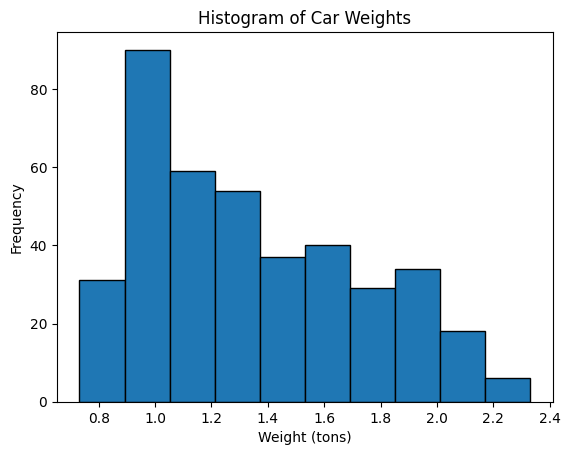

In [10]:
plt.hist(df['weight'], edgecolor='black')
plt.xlabel('Weight (tons)')
plt.ylabel('Frequency')
plt.title('Histogram of Car Weights')
plt.show()

#### Plot a histogram of the `model_year`

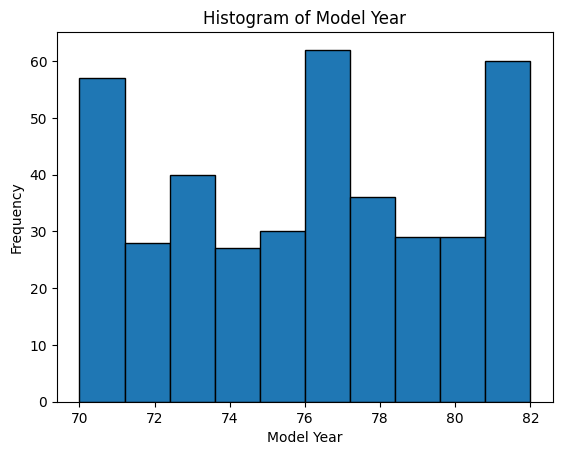

In [11]:
plt.hist(df['model_year'], edgecolor='black')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.title('Histogram of Model Year')
plt.show()

#### Pandas has a convenience function to plot histograms, but it uses the same matplotlib library. You can call the hist() on the column of a DataFrame. Try it.

In [ ]:
# your code here

#### You can also call `aggregate` functions on a DataFrame column, like `min`, `max`, `mean`, `median`, etc. Try it.

#### Compute the average and the median weight

In [ ]:
#your code here
average_weight = df["weight"].mean()
median_weight = df["weight"].median()

print("Average Weight:", average_weight)
print("Median Weight:", median_weight)

If you sum all elements of a boolean array, False is treated as 0 and True as 1. Therefore `bool_array.sum()` is the number of True elements in the array. For example `(df.weight > 2).sum()` is the number of models that weight above 2 tons.

#### Find the number of cars that weight more than 2 tons

In [14]:
mask=df["weight"]>2
print(mask)
mask.sum()

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Name: weight, Length: 398, dtype: bool


np.int64(26)

In [18]:
# your code here
df_filtered=df[df["weight"]>2]
df_filtered.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,weight_tons,lphk
8,14.0,8,455.0,225.0,2.007149,10.0,70,usa,pontiac catalina,2.007149,16.800714
25,10.0,8,360.0,215.0,2.093331,14.0,70,usa,ford f250,2.093331,23.521000
28,9.0,8,304.0,193.0,2.146402,18.5,70,usa,hi 1200d,2.146402,26.134444
39,14.0,8,400.0,175.0,2.024839,11.5,71,usa,pontiac catalina brougham,2.024839,16.800714
42,12.0,8,383.0,180.0,2.247553,11.5,71,usa,dodge monaco (sw),2.247553,19.600833


#### Find how many cars there are for each number of cylinders

In [ ]:
#your code here
len(df_filtered)

#### Find what are the car models with unusual number of cylinders (3 or 5)

In [ ]:
# your code here

#### Use `df.describe()` to explore the dataset. What years does it cover? What are the extremes of car weight?

In [ ]:
# your code here

#### Find the lightest and heaviest cars, what make and model are they?

In [ ]:
# your code here

#### Find the most fuel efficient car (minimum lphk)

In [ ]:
#your code here

#### For each of the columns in `fit_cols` plot `lphk` as a function of that column (`lphk`  on the `y` axis). Check if any linear relationship is clearly visible

####  pass `alpha=0.5` to plt.scatter to make the points semi-transparent

In [21]:
fit_cols = ['weight', 'cylinders', 'displacement', 'horsepower']
fit_cols

['weight', 'cylinders', 'displacement', 'horsepower']

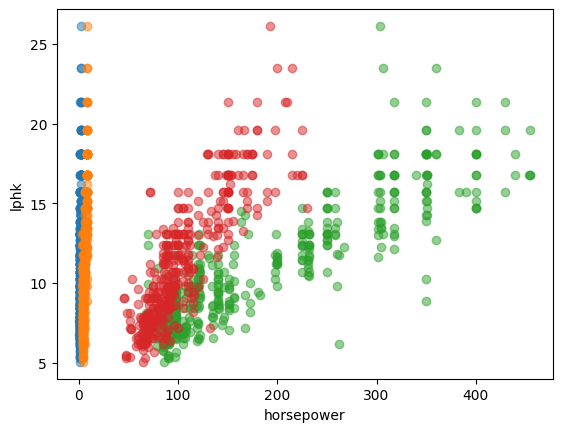

In [22]:
for col in fit_cols:
    plt.scatter(df[col], df['lphk'], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('lphk')

## Linear Fit using 1 variable - weight

#### OBJECTIVE

- Fit a line to the (training) data using the `weight` column as the independent variable and `lphk` as the dependent variable

- predict the `lphk` for test data

#### Split the data into training and testing sets (`random_state=123`)


In [ ]:
X = df['weight']
y = df['lphk']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [24]:
X = df['weight']
y = df['lphk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

#### Plot training data and testing data on the same scatter plot

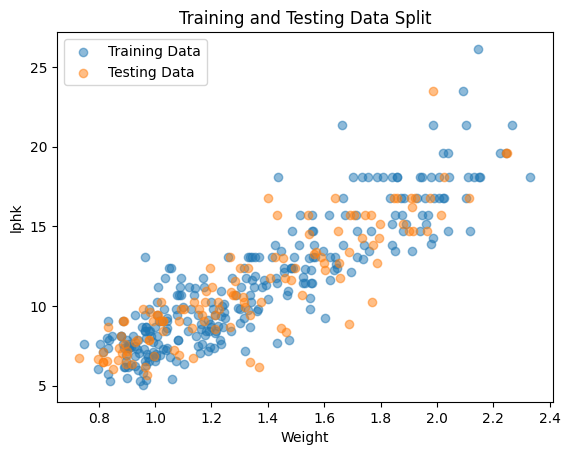

In [25]:
plt.scatter(X_train, y_train, label='Training Data', alpha=0.5)
plt.scatter(X_test, y_test, label='Testing Data', alpha=0.5)
plt.xlabel('Weight')
plt.ylabel('lphk')
plt.title('Training and Testing Data Split')
plt.legend()
plt.show()

#### To fit a line, we need to find the slope and intercept of a line.

![linear equation](https://www.katesmathlessons.com/uploads/1/6/1/0/1610286/2964252_orig.png)
![linear graph](https://www.katesmathlessons.com/uploads/1/6/1/0/1610286/1163738_orig.png)

#### First let's run a fit using np.polyfit to get the line slope and intercept

In [ ]:
a, b = np.polyfit(X_train, y_train, 1)
# a is slope, b is intercept
a, b

(np.float64(8.158615530142473), np.float64(-0.9132759011979984))

#### Plot the training data and the line

#### you need to draw a line using the slope and intercept you found -  the range of x values should be the same as the range of the training data [0.75 - 2.5]

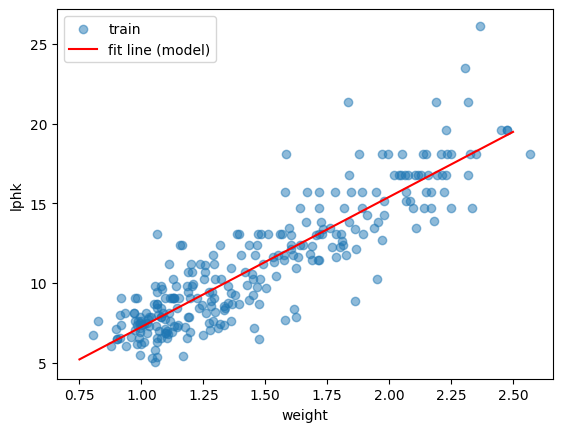

In [ ]:
x = np.linspace(0.75, 2.5, 100)
y = a*x + b

plt.scatter(X_train, y_train, label='train', alpha=0.5)
plt.plot (x, y, color='red', label='fit line (model)')
plt.xlabel('weight')
plt.ylabel('lphk')
plt.legend()

#### Using a and b, what will be the predicted consumption of a hypothetical car weighting 1.2 tons?

In [27]:
a, b = np.polyfit(X_train, y_train, 1)
predicted_lphk_1_2_tons = a * 1.2 + b
print(f"The predicted fuel consumption for a car weighing 1.2 tons is: {predicted_lphk_1_2_tons:.2f} lphk")

The predicted fuel consumption for a car weighing 1.2 tons is: 9.87 lphk


#### Now predict the consumption for a sample car in test set for example X_test[0]

In [28]:
predicted_lphk_test_sample = a * X_test.iloc[0] + b
print(f"The predicted fuel consumption for the first car in the test set ({X_test.iloc[0]:.2f} tons) is: {predicted_lphk_test_sample:.2f} lphk")

The predicted fuel consumption for the first car in the test set (1.08 tons) is: 8.80 lphk


#### Plot the fitted line (model) and show the X_test[0] and y_test[0] and y_predicted on the same plot

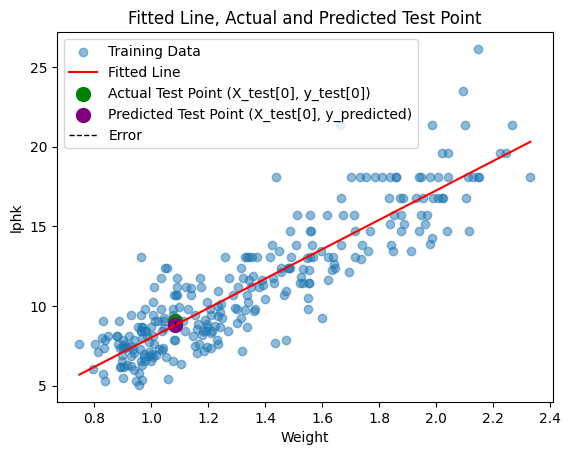

In [29]:
# Plot the training data and the fitted line
x = np.linspace(X_train.min(), X_train.max(), 100)
y_fit = a * x + b

plt.scatter(X_train, y_train, label='Training Data', alpha=0.5)
plt.plot(x, y_fit, color='red', label='Fitted Line')

# Plot the first test point and its prediction
plt.scatter(X_test.iloc[0], y_test.iloc[0], color='green', s=100, label='Actual Test Point (X_test[0], y_test[0])')
plt.scatter(X_test.iloc[0], predicted_lphk_test_sample, color='purple', s=100, label='Predicted Test Point (X_test[0], y_predicted)')
plt.plot([X_test.iloc[0], X_test.iloc[0]], [y_test.iloc[0], predicted_lphk_test_sample], color='black', linestyle='--', linewidth=1, label='Error')


plt.xlabel('Weight')
plt.ylabel('lphk')
plt.title('Fitted Line, Actual and Predicted Test Point')
plt.legend()
plt.show()

#### Compute the error between the predicted value and the actual value

In [30]:
error = y_test.iloc[0] - predicted_lphk_test_sample
print(f"The error between the actual and predicted lphk for the first test sample is: {error:.2f}")

The error between the actual and predicted lphk for the first test sample is: 0.25


#### (1) take 10  points from the test set

#### (2) find the prediction for the 10 points

#### (3) plot the true and predicted values besides the fitted line (model)

#### (4) compute the average error

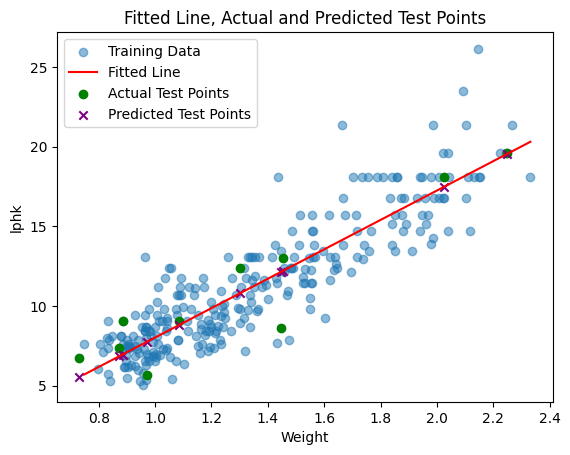

The average error for the first 10 test samples is: 0.15


In [31]:
# (1) take 10 points from the test set
num_points = 10
X_test_sample = X_test.head(num_points)
y_test_sample = y_test.head(num_points)

# (2) find the prediction for the 10 points
y_predicted_sample = a * X_test_sample + b

# (3) plot the true and predicted values besides the fitted line (model)
x_fit = np.linspace(X_train.min(), X_train.max(), 100)
y_fit = a * x_fit + b

plt.scatter(X_train, y_train, label='Training Data', alpha=0.5)
plt.plot(x_fit, y_fit, color='red', label='Fitted Line')
plt.scatter(X_test_sample, y_test_sample, color='green', label='Actual Test Points')
plt.scatter(X_test_sample, y_predicted_sample, color='purple', marker='x', label='Predicted Test Points')

plt.xlabel('Weight')
plt.ylabel('lphk')
plt.title('Fitted Line, Actual and Predicted Test Points')
plt.legend()
plt.show()

# (4) compute the average error
average_error = np.mean(y_test_sample - y_predicted_sample)
print(f"The average error for the first {num_points} test samples is: {average_error:.2f}")

#### Numerical estimate of how good this fit is
 - One common measure for the quality of a linear fit is the mean square error (MSE)
 - Assume that $y_i$ is the real value from data and $\hat{y}_i$ is the predicted value found as $\hat{y}_i = ax_i + b$
 - Taking the differences between the real and predicted values, then squaring them as $(y_i - \hat{y}_i)^2$ and then averaging gives the MSE

$MSE = \frac{1}{N} \sum{(y_i - \hat{y}_i)^2}$

#### Find the MSE for this fit and name it `y_pred1`

In [32]:
# Predict the values for the test set using the fitted line
y_pred_test = a * X_test + b

# Compute the Mean Squared Error (MSE)
mse1 = np.mean((y_test - y_pred_test)**2)

# Although the prompt asked to name it y_pred1, naming it mse1 is more descriptive.
print(f"The Mean Squared Error (MSE) for the linear fit with weight is: {mse1:.2f}")

The Mean Squared Error (MSE) for the linear fit with weight is: 3.14


## Same fit using sklearn.linear_models.LinearRegression
The 4 steps of model use in sklearn:
 1. Import (the Python class for the model you want to use)
 2. Instantiate (the class to create an object)
 3. Fit
 4. Predict

Just run the steps below, no need to modify this code

#### 1. Import

In [ ]:
from sklearn.linear_model import LinearRegression

#### 2. Instantiate

In [ ]:
model = LinearRegression()

#### 3. Fit

#### fit() expects a 2D data structure: `2D numpy array` or a `pd.DataFrame` for X

#### Printing `X_train` and also `type(X_train)`

In [ ]:
print(type(X_train))
print(X_train)

#### As you can see the type of X_train, X_test are `Series`.  

#### `Series` and `DataFrame` are two main data structures in pandas.

#### `Series` is 1D,

#### and `DataFrame` is a multi-dimensional table made up of a collection of Series.

#### Because sklearn model.fit() function does not accept Pandas Series as the X argument, we need to convert `X_train` and `X_test` `Series` to either a Numpy array or a DataFrame

In [ ]:
X_train_df = pd.DataFrame(X_train)
X_train_df

you can see the difference in the form of printing output for `Series` and `DataFrame` types.

#### Having X_train as a data frame, fit the model

In [ ]:
#solution
model.fit(X_train_df, y_train)

LinearRegression()

#### 4. Predict

#### predict() takes a 2D array or pd.DataFrame with the same as used in fit()

#### Change the `X_test` type from `Series` to `DataFrame` and then predict the values for the test set

### name your prediction `y_pred_test`

In [ ]:
# your code here

#### Take a look at `model.coef_` and `model.intercept_` and compare them to a and b from before

In [ ]:
model.coef_, model.intercept_

In [ ]:
# recalling the value of a and b
a, b

(np.float64(8.158615530142473), np.float64(-0.9132759011979984))

#### sklearn comes with a variety of metrics used to estimate quality of models, including the MSE.

#### Run the cell below and verify that the result is the same as the one you got before

In [ ]:
from sklearn import metrics
test_error = metrics.mean_squared_error(y_test, y_pred_test)
test_error

np.float64(3.107035576727725)

#### predict the values for the TRAIN set

#### name your prediction `y_pred_train`

#### Find the MSE for train set

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas as pd

model = LinearRegression()
X_train_df = pd.DataFrame(X_train)
model.fit(X_train_df, y_train)

y_pred_train = model.predict(X_train_df)
print(y_pred_train)

train_error = metrics.mean_squared_error(y_train, y_pred_train)
train_error

[18.27185916 16.96182692  8.98025667 13.94414881  6.47319817  7.70789309
 11.26130323  8.04272561 11.16922429  9.57039899  9.69596119  8.5449744
 18.61087709 12.15698023  7.01730101 12.72619551 12.75549336 16.76511281
  6.21370296  8.73331769 10.51211546 12.85594312  5.69471255 19.5191103
  7.43584167  8.50312033  7.70789309  6.51505223  7.83345529 12.87687015
 13.2284443   9.84245042 10.17728294 11.11899941  8.4194122   7.01730101
 12.45414409  8.81702582  6.60713117 18.33045485 10.97251018 13.75162011
  9.65410713 19.3265816   8.10969212  8.33151866 10.93484152  8.36918732
  8.71239066  7.95901748 20.30596673 11.51242762 12.93965125 14.60125764
 11.36175299 10.24006404  7.35213354 11.97700775 13.56746223 12.05653047
  7.87949476 12.32439649 16.84045013 12.37462137 15.87780663  7.95064667
 13.12799454 16.89486041 16.12474561  7.12193618 10.32377217 10.26099107
  7.17634646 11.93515368  7.68696606 14.86493825  8.08457968 12.55459385
 13.18659023  6.53597926  8.14317537  7.10100914  7.7

3.361198808826371

## Multiple explanatory variables
Regression with multiple explanatory variables
is no different from the simple case with one variable we just saw, the prediction for 3 explanatory variables looks like this:

$ \hat{y} = a_1 x_1 + a_2 x_2 + a_3 x_3 + b $

The coefficients in `linreg.coef_` will be `[a1, a2, a3]` after the fit()

#### Using the X with all columns from `fit_cols` copy and repeat the fit and predict steps above to obtain a new fit
 - Import is no longer needed since the LinearRegression class is already imported
 - It's up to you whether to instantiate a new object or reuse the old one. It's considered to be a good practice to create a new one in such cases, since it reduced the risk of confusion, but it's not a strict rule.

In [ ]:
# Use X with all columns in fit_cols
X = df[fit_cols]
y = df['lphk']
X.head()

In [ ]:
print(X.shape)
print(y.shape)

(392, 4)
(392,)


In [ ]:
model_multiple = LinearRegression()
model_multiple.fit(X, y)

LinearRegression()

In [ ]:
model_multiple.coef_, model_multiple.intercept_

#### Take a look at the coefficients (they come in the same order as columns in X)

In [ ]:
list(zip(X.columns, model_multiple.coef_))

#### Use `metrics.mean_squared_error()` to compute the MSE again. Does it mean we got a better or worse fit?

In [ ]:
mse2 = metrics.mean_squared_error(y, model_multiple.predict(X))
mse2

np.float64(2.7834576195587077)

#### Compare this erro with the train_error + test_error in the previous section

In [38]:
# Define X with multiple features
fit_cols = ['weight', 'cylinders', 'displacement', 'horsepower']
X = df[fit_cols]

# Drop rows with missing values in the fit_cols
X = X.dropna(subset=fit_cols)
y = y[X.index] # Align y with the filtered X

# Instantiate and fit the multiple linear regression model
model_multiple = LinearRegression()
model_multiple.fit(X, y)

# Calculate MSE for the multiple feature model
mse2 = metrics.mean_squared_error(y, model_multiple.predict(X))

print(f"Train MSE (single feature): {train_error:.2f}")
print(f"Test MSE (single feature): {mse1:.2f}")
print(f"MSE (multiple features): {mse2:.2f}")

Train MSE (single feature): 3.36
Test MSE (single feature): 3.14
MSE (multiple features): 2.78


#### Try excluding each of the 4 columns from the X (one at a time), run the fit and compute MSE each time. Which of the column results in the largest degradation in quality of fit when removed?
 - This can be interpreted as an estimate of importance of that column in explaining the dependant variable

In [42]:
original_cols = ['weight', 'cylinders', 'displacement', 'horsepower']

# Ensure y is aligned with the df that has missing values in fit_cols dropped
df_filtered = df.dropna(subset=original_cols)
y = df_filtered['lphk']
X = df_filtered[original_cols] # Also align X with the filtered df

original_mse = metrics.mean_squared_error(y, model_multiple.predict(X))
print(f"Original MSE with all features: {original_mse:.2f}\n")

for col_to_exclude in original_cols:
    # Create a list of columns excluding the current one
    current_cols = [col for col in original_cols if col != col_to_exclude]

    # Define X with the current set of columns from the already filtered dataframe
    X_current = df_filtered[current_cols]

    # y_current is already aligned with df_filtered, so no need to reindex here
    y_current = y

    # Instantiate and fit a new linear regression model
    model_current = LinearRegression()
    model_current.fit(X_current, y_current)

    # Calculate MSE for the current model
    mse_current = metrics.mean_squared_error(y_current, model_current.predict(X_current))

    print(f"MSE excluding '{col_to_exclude}': {mse_current:.2f}")

Original MSE with all features: 2.78

MSE excluding 'weight': 3.28
MSE excluding 'cylinders': 2.81
MSE excluding 'displacement': 2.79
MSE excluding 'horsepower': 3.10


#### Which of the 4 columns is least valuable for the fit?

#your answer here: